Car Price Prediction Project


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [2]:

car_data = pd.read_csv('/home/harish/Downloads/ oasis projects/car price prediction project/car data.csv')
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [4]:
car_data.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [5]:
car_data.Transmission.value_counts()

Transmission
Manual       261
Automatic     40
Name: count, dtype: int64

In [6]:
car_data.shape

(301, 9)

In [7]:
car_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [8]:
car_data.Fuel_Type.value_counts()

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64

In [9]:
print(car_data.Car_Name.value_counts())

Car_Name
city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: count, Length: 98, dtype: int64


In [10]:
print(car_data.Year.value_counts)

<bound method IndexOpsMixin.value_counts of 0      2014
1      2013
2      2017
3      2011
4      2014
       ... 
296    2016
297    2015
298    2009
299    2017
300    2016
Name: Year, Length: 301, dtype: int64>


In [11]:
print(car_data.Selling_Price.value_counts())
print(car_data.Present_Price.value_counts())
print(car_data.Driven_kms.value_counts())
print(car_data.Fuel_Type.value_counts())
print(car_data.Selling_type.value_counts())
print(car_data.Transmission.value_counts())
print(car_data.Owner.value_counts())

Selling_Price
0.45     8
0.60     8
5.25     7
4.50     7
0.20     6
        ..
3.80     1
3.45     1
5.90     1
35.00    1
11.50    1
Name: count, Length: 156, dtype: int64
Present_Price
9.40     14
13.60    13
5.70      8
1.47      7
0.51      6
         ..
36.23     1
18.54     1
7.27      1
15.04     1
12.50     1
Name: count, Length: 148, dtype: int64
Driven_kms
45000    9
15000    9
40000    5
35000    5
50000    5
        ..
1400     1
1200     1
4100     1
21700    1
5464     1
Name: count, Length: 206, dtype: int64
Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Selling_type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64
Owner
0    290
1     10
3      1
Name: count, dtype: int64


In [12]:
# petrol = 0, disel = 1, CNG = 2
car_data.replace({'Fuel_Type':
                  {'Petrol':0,
                   'Diesel':1,
                   'CNG':2}}, inplace=True)

# Dealer = 0, Individual = 1
car_data.replace({'Selling_type':
                  {'Dealer':0,
                   'Individual':1}}, inplace=True)

# Manual = 0, Automatic = 1 
car_data.replace({'Transmission':
                  {'Manual':0,
                   'Automatic':1}}, inplace=True)

car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [13]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [14]:
x  = car_data.drop('Car_Name', axis=1)
y = car_data.Present_Price

print(x.head())
print(y.head())

   Year  Selling_Price  Present_Price  Driven_kms  Fuel_Type  Selling_type  \
0  2014           3.35           5.59       27000          0             0   
1  2013           4.75           9.54       43000          1             0   
2  2017           7.25           9.85        6900          0             0   
3  2011           2.85           4.15        5200          0             0   
4  2014           4.60           6.87       42450          1             0   

   Transmission  Owner  
0             0      0  
1             0      0  
2             0      0  
3             0      0  
4             0      0  
0    5.59
1    9.54
2    9.85
3    4.15
4    6.87
Name: Present_Price, dtype: float64


In [15]:
x_train, x_test, y_train, y_test = train_test_split(x,y , test_size=0.1, random_state=2)
x.shape

(301, 8)

In [16]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [17]:
train_data_prediction = model.predict(x_train)
error_score = metrics.r2_score(y_train, train_data_prediction)
print("R score Error", error_score)

R score Error 1.0


<function matplotlib.pyplot.show(close=None, block=None)>

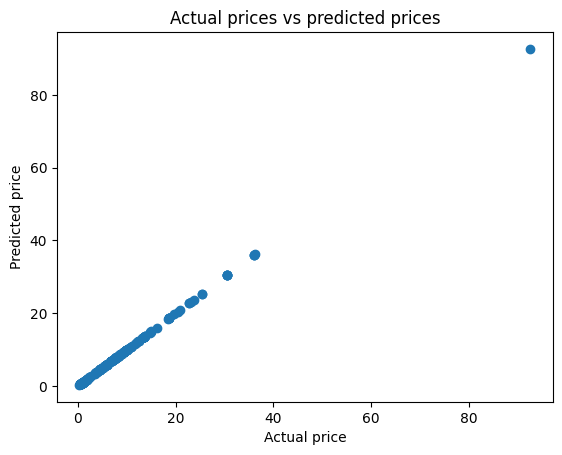

In [18]:
plt.scatter(y_train, train_data_prediction)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Actual prices vs predicted prices")
plt.show

In [21]:
test_data_prediction = model.predict(x_test)
error_score = metrics.r2_score(y_test, test_data_prediction)
print("R Score Error", error_score)

R Score Error 1.0


<function matplotlib.pyplot.show(close=None, block=None)>

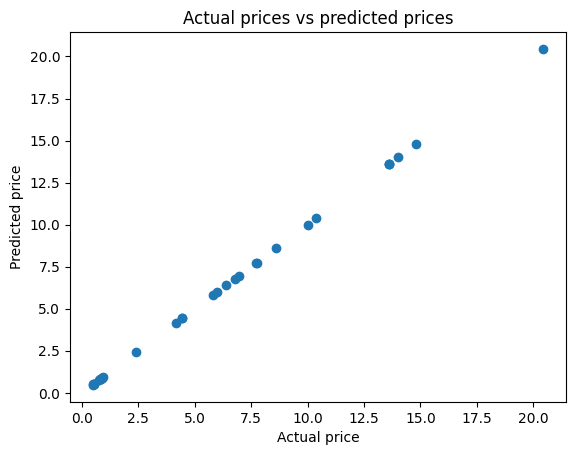

In [22]:
plt.scatter(y_test, test_data_prediction)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Actual prices vs predicted prices")
plt.show

In [25]:
car_data.loc[8]

Car_Name          ciaz
Year              2016
Selling_Price     8.75
Present_Price     8.89
Driven_kms       20273
Fuel_Type            1
Selling_type         0
Transmission         0
Owner                0
Name: 8, dtype: object

In [26]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0
